(k-means)=
クラスタリング
==============
```{epigraph}
God, give us grace to accept with serenity
the things that cannot be changed,
Courage to change the things
which should be changed,
and the Wisdom to distinguish
the one from the other.

-- Serenity Prayer
```

分類とは、何かの基準に基づいて対象を整理し、グループに分ける作業です。
この**基準**の定義が重要です。基準が異なれば、グループの構成も変わります。
たとえば、動物を分類する場合には、以下のような基準が考えられます。
その基準によって分類結果も異なります。

- 生息環境
  - 陸上動物
  - 水生動物
  - 両生類
- 食性
  - 肉食動物
  - 草食動物
  - 雑食動物
- 体温調節
  - 恒温動物
  - 変温動物

では、その基準がない場合はどうでしょうか。
明確な基準がないと対象をグループに分類できません。
このような状況で活用される手法がクラスタリングです。

クラスタリングは、事前に定義された基準なしに、
データ自体の特徴や類似性に基づいてグループ（クラスタ）を形成する方法です。
これは機械学習や統計学の分野で広く使用されており、
大量のデータから自動的にパターンや構造を見出すのに役立ちます。

クラスタリングの主な目的は以下の通りです。

- 似たもの同士をグループ化：同じクラスタ内のデータポイントは互いによく似るようにします。
- 異なるグループを区別：違うクラスタに属するデータポイント同士は、できるだけ異なるようにします。

重要なのは、クラスタリングは事前に決められた基準にデータを当てはめるのではなく、
データ自体の特性から自然なグループを見出すという点です。
これにより、私たちが気づいていなかった新しいパターンや関係性を発見できる可能性があるのです。

クラスタリングを行う際は、

- どのようにグループを作るか（似ているかどうかをどう判断するか）
- いくつのグループに分けるか

などを考える必要があります。

また、作られたグループが本当に意味があるかを確認する必要があります。

## k-means法

k-means法は、最も一般的で広く使用されているクラスタリングアルゴリズムの一つです。
このアルゴリズムは、データをk個のクラスタに分割することを目的としています。
ここで、kはユーザーが事前に指定する値です。

```{prf:algorithm} k-means法のアルゴリズム
:label: kmeans-algo

1. k個の中心点（クラスタの中心）をランダムに初期化: $\{\mu_1, \mu_2, ..., \mu_k\}$
2. 以下を収束するまで繰り返す
   1. 各データポイント $x_i$ を最も近い中心点に割り当てる
      $c_i = \arg\min_j ||x_i - \mu_j||^2$
   2. 各クラスタの新しい中心点を計算する
      $\mu_j = \frac{1}{|C_j|} \sum_{i \in C_j} x_i$
```

ここで、$c_i$はデータポイント$x_i$が割り当てられたクラスタのインデックス、
$C_j$は$j$番目のクラスタに属するデータポイントの集合、$|C_j|$はそのクラスタのサイズです。
また、収束の条件は通常、中心点の位置がほとんど変化しなくなるか、最大反復回数に達した時になります。

以下にk-means法で重要な2点を挙げます。

- データ間の**距離**を数値で表現できる
- 各グループの**中心**（平均）を計算できる

これをもう少し詳しく説明すると、

- **距離の定義**
   - データ同士がどれくらい似ているか（または異なるか）を数値で表す。
   - 例えば、2次元平面上の点なら直線距離、文書なら単語の使用頻度の差などを使います。

- **中心の計算**
   - 各グループの代表的な値（中心）を求められる。
   - 通常は平均値を使用。データの性質に応じて中央値などを使うことも。

k-means法はこれらを繰り返し計算し、似たデータを同じグループにまとめていきます。

## k-means法の例

k-means法の動作を視覚的に理解するために、{ref}`scatter-fig`で使用した`iris`データを使って、クラスタリングをしてみます。

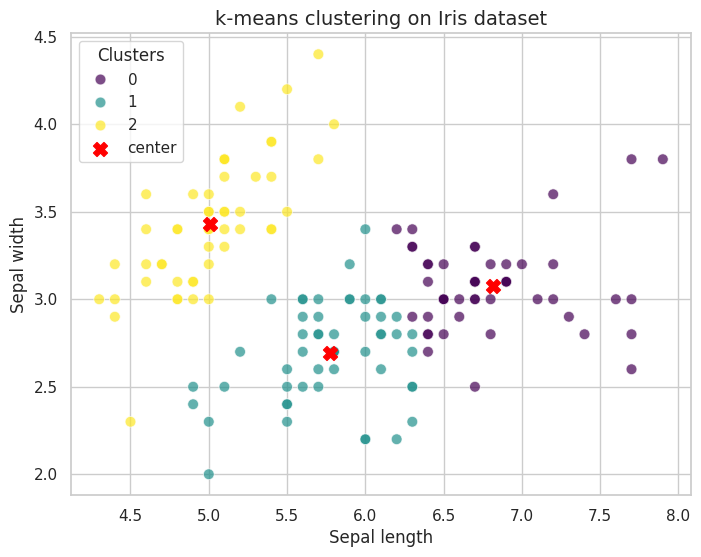

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

iris = sns.load_dataset('iris')
X = iris[['sepal_length', 'sepal_width']].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette='viridis', alpha=0.7, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=100, linewidths=1, label='center')
plt.xlabel('Sepal length', fontsize=12)
plt.ylabel('Sepal width', fontsize=12)
plt.legend(title="Clusters")
plt.title('k-means clustering on Iris dataset', fontsize=14)
plt.show()

プログラムの説明をします。
`iris`データセットを読み込み、がく片（sepal）の長さと幅の2つの特徴量を使ってクラスタリングします。

6行目で読み込まれた`iris`データはPandasのDataFrame形式になっています。
ここでは、sepal_length（がく片の長さ）とsepal_width（がく片の幅）の2つの特徴量を選択し、NumPy配列としてXに格納しています。

9行目で`KMeans`クラスをインスタンス化し、k-means法のモデルを作成しています。
ここでは、クラスタ数を3に設定しています。
k-meansではユーザーが事前にクラスタ数を指定する必要があります。

10行目で`fit`メソッドを使ってk-means法を実行し、データをクラスタリングしています。

結果として、3つのクラスタとそれぞれの中心点が異なる色で表示されたグラフが生成されます。
これにより、k-means法がどのようにデータをグループ分けしたかを視覚的に理解できるでしょう。

k-means法の主な利点は以下の通りです。

- 実装が簡単で、大規模なデータセットにも適用可能
- アルゴリズムの収束が速い
- 結果が解釈しやすい

一方で、k-means法には以下のような欠点もあります。

- クラスタ数kを事前に指定する必要がある
- 初期中心点の選択に結果が依存する
- 球形のクラスタを仮定しているため、複雑な形状のクラスタを適切に分離できない場合がある
- 外れ値に敏感

## 最適なクラスタ数の選択

k-means法を使用するときの主な課題の1つは、適切なクラスタ数$k$の選択です。

この問題に対処するための一般的な方法として、

- クラスタ内平方和（Within-Cluster Sum of Squares, WCSS）
- シルエットスコア
- Calinski-Harabasz指標

があります。

これらの指標の変化を観察し、**エルボー**（急激な変化の点）を見つけ、適切なクラスタ数を推定します。

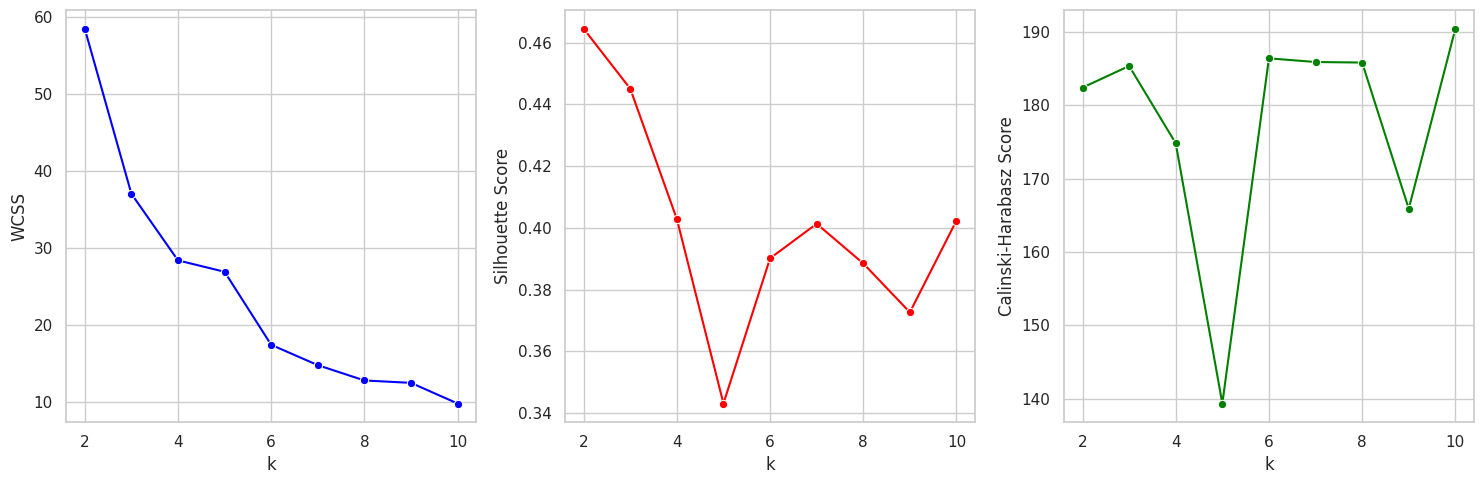

In [2]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

wcss = []
silhouette_scores = []
calinski_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(X, kmeans.labels_))

plt.figure(figsize=(15, 5))

# WCSSプロット
plt.subplot(131)
sns.lineplot(x=list(k_range), y=wcss, marker='o', color='blue')
plt.xlabel('k')
plt.ylabel('WCSS')

# シルエットスコアプロット
plt.subplot(132)
sns.lineplot(x=list(k_range), y=silhouette_scores, marker='o', color='red')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

# Calinski-Harabaszスコアプロット
plt.subplot(133)
sns.lineplot(x=list(k_range), y=calinski_scores, marker='o', color='green')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')

# レイアウト調整
plt.tight_layout()
plt.show()

このプログラムは、異なるクラスタ数に対して3つの評価指標を計算し、結果をプロットしています。
複数の指標で比較すると、最適な値を見つけやすくなるでしょう。